# Expectativa de vida - WHO ML

O  objetivo é prever a expectativa de vida da população com base em fatores
econômicos, sociais e de saúde

In [36]:
# Pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
dados = pd.read_csv('/home/gibueno/Documentos/2024/UFPR/2 SEMESTRE/ML/Life-Expectancy-WHO-ML/Data/Life Expectancy Data.csv')

# Exploração inicial dos dados

In [26]:
# Verificação do dataframe e das variáveis

dados.head


<bound method NDFrame.head of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0 

In [27]:
dados.shape


(2938, 22)

In [28]:
dados.isna().sum() # Quantidade absoluta de dados faltantes por variável


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [29]:
dados.isna().mean()*100 # Quantidade percentual de dados faltantes por variável


Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [30]:
dados.isna().sum() # Quantidade absoluta de dados faltantes por variável


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [31]:
dados.isna().mean()*100 # Quantidade percentual de dados faltantes por variável


Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [32]:
dados.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

* O conjunto de dados contém 2938 observações e 22 variáveis.
* As variáveis com mais dados faltantes são "Population" com 22,19% de NAs, "Hepatitis B" com 18,82% de NAs e GDP com 15,24% de NAs.
Nós optamos por remover as variáveis País e Ano uma vez que são variáveis relacionadas com a resposta de interesse, logo, de antemão não irão contribuir para o modelo. 


In [33]:
dados = dados.drop(columns=['Country', 'Year', 'Status'])

## Correlograma

In [34]:
correlacao = dados.corr() # calculo da matriz de correlação para as variáveis


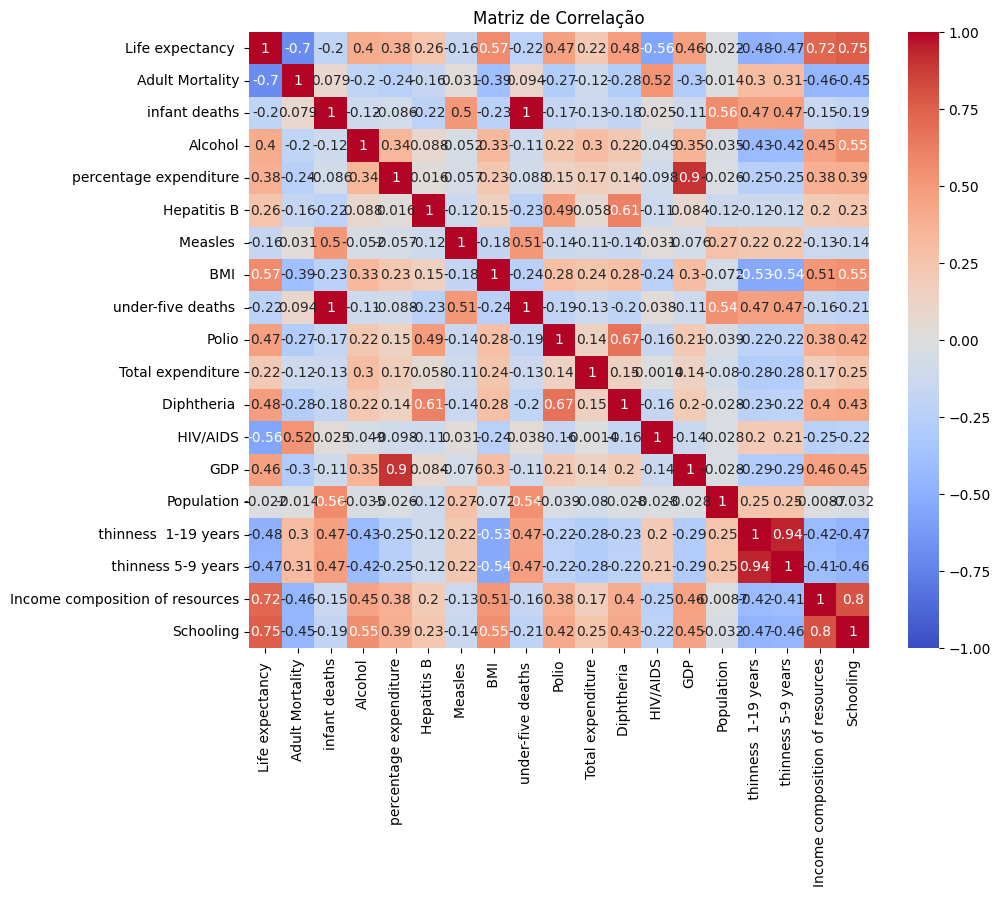

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot= True, cmap = "coolwarm", vmin = -1, vmax = 1)
plt.title("Matriz de Correlação")
plt.show()

### Categorização da variável resposta

In [ ]:
# Criar a variável categórica baseada em 'Life expectancy'
dados['Life_expectancy_category'] = np.where(dados['Life expectancy '] >= 70, '>=70', '<70')

# Exibir as primeiras linhas do DataFrame para verificar
print(dados[['Life expectancy ', 'Life_expectancy_category']].head())

   Life expectancy  Life_expectancy_category
0              65.0                      <70
1              59.9                      <70
2              59.9                      <70
3              59.5                      <70
4              59.2                      <70


In [ ]:
# Contagem de observações nas duas classes
proporcao_classes = dados['Life_expectancy_category'].value_counts(normalize=True)

# Proporção de cada classe
print(proporcao_classes)


Life_expectancy_category
>=70    0.554118
<70     0.445882
Name: proportion, dtype: float64


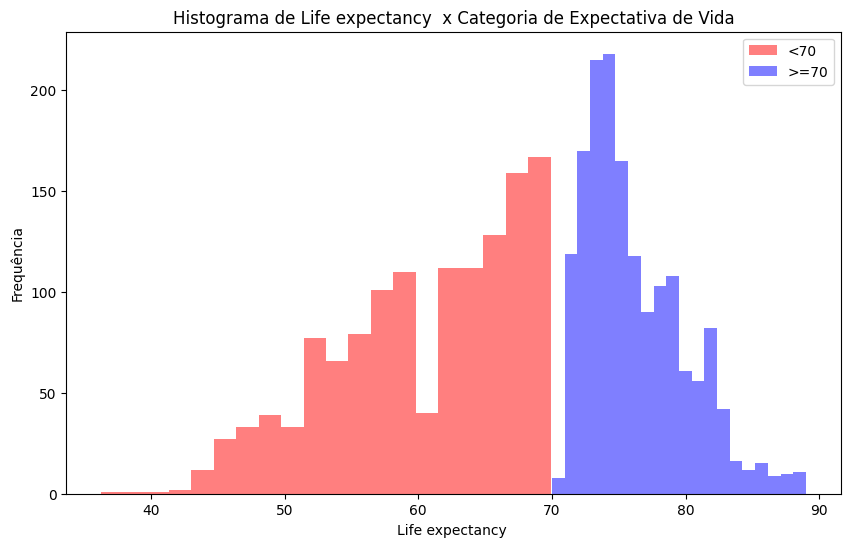

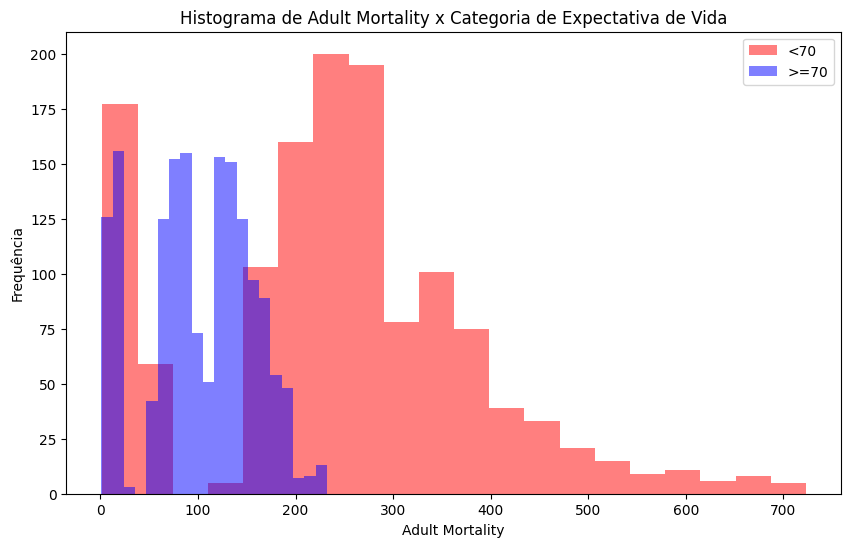

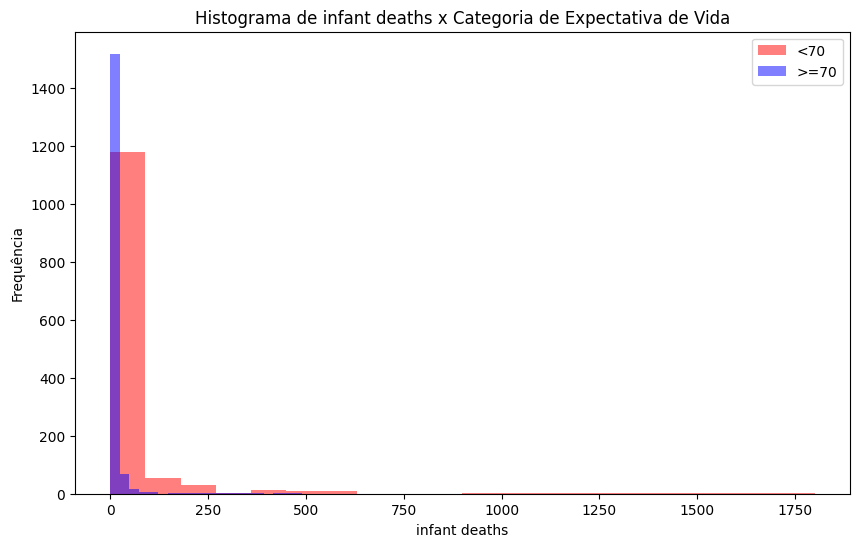

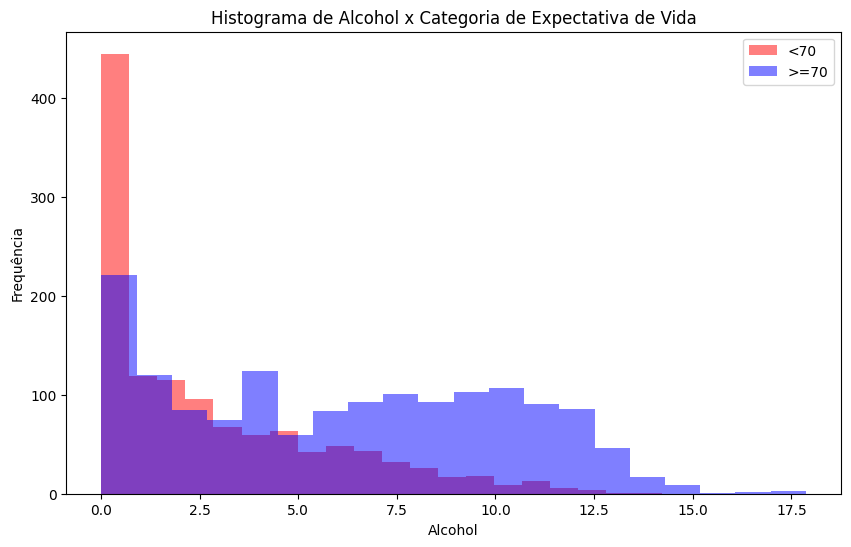

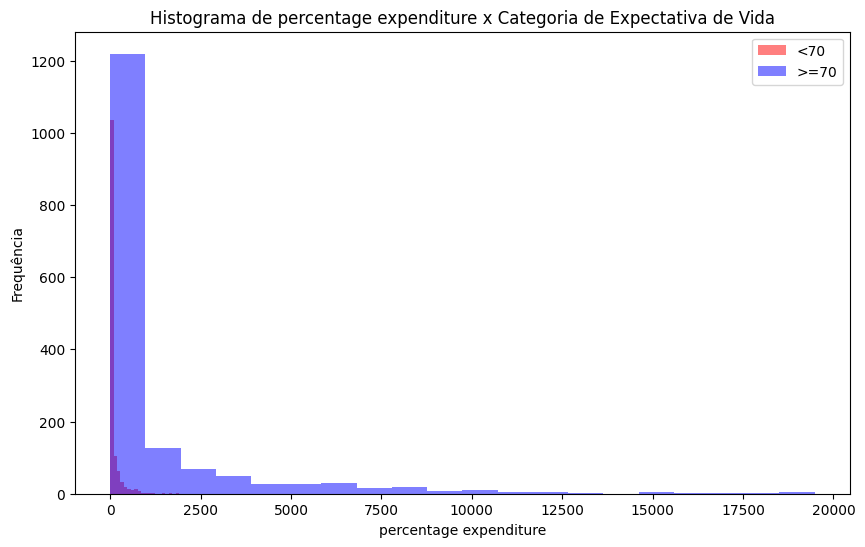

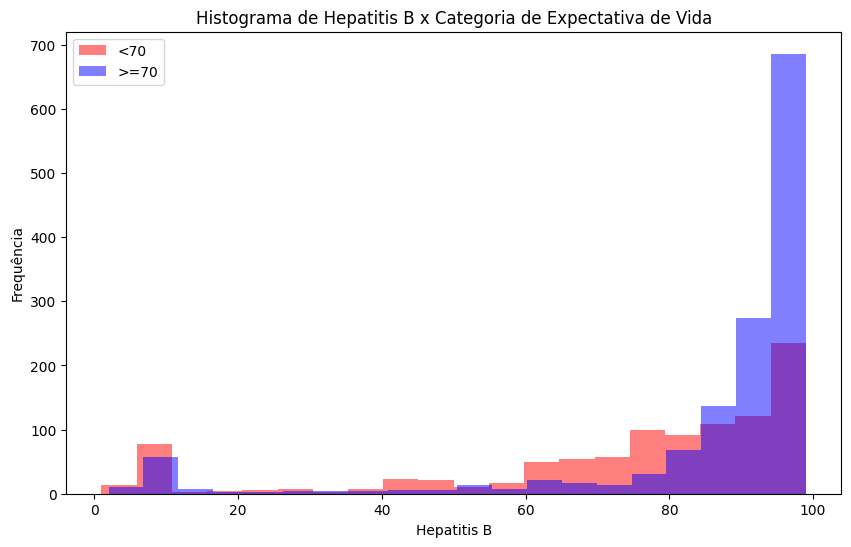

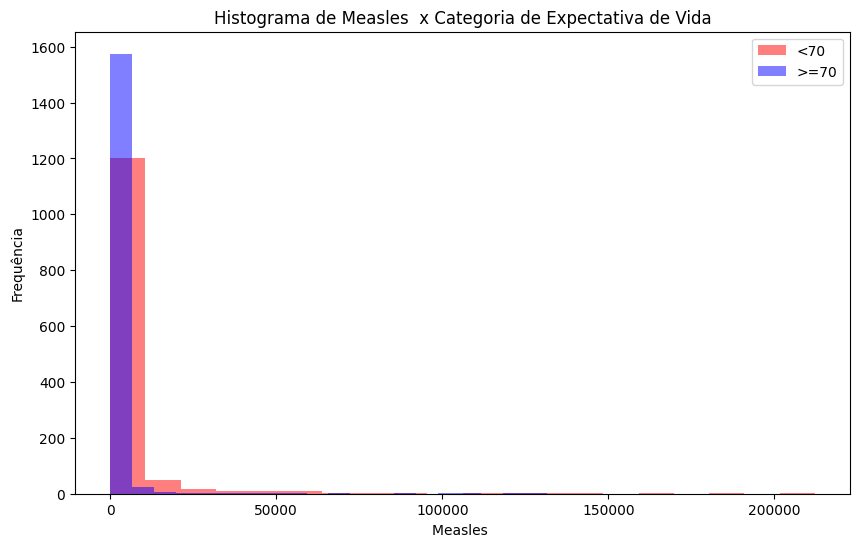

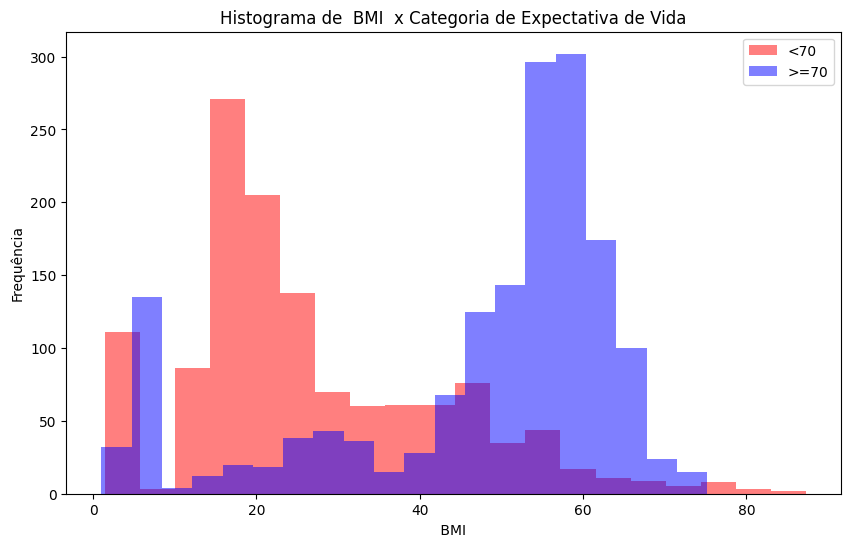

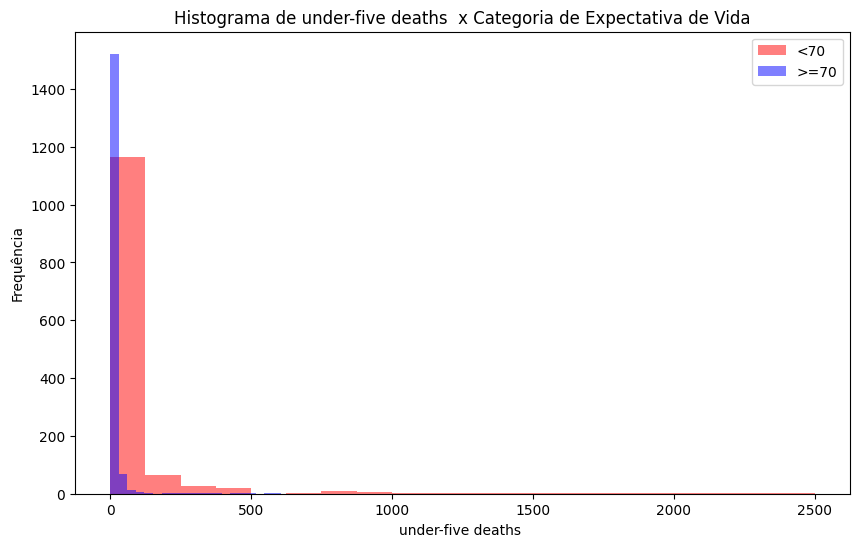

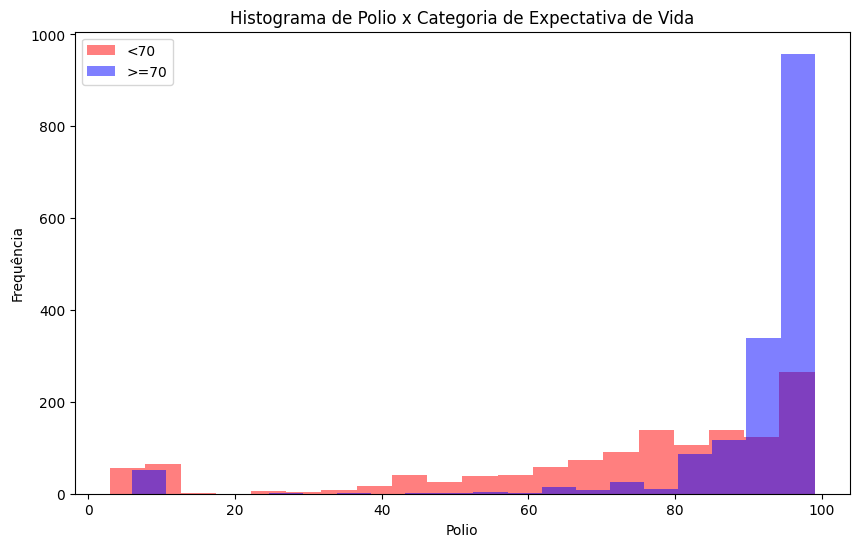

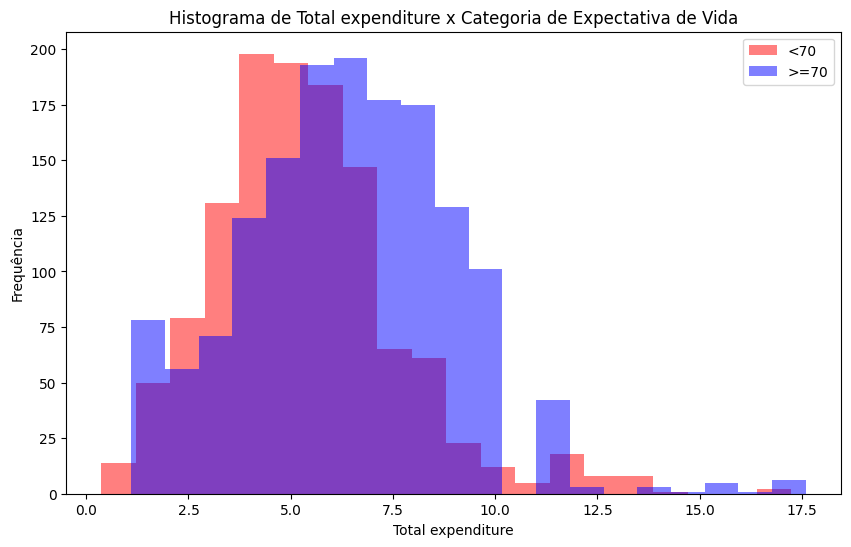

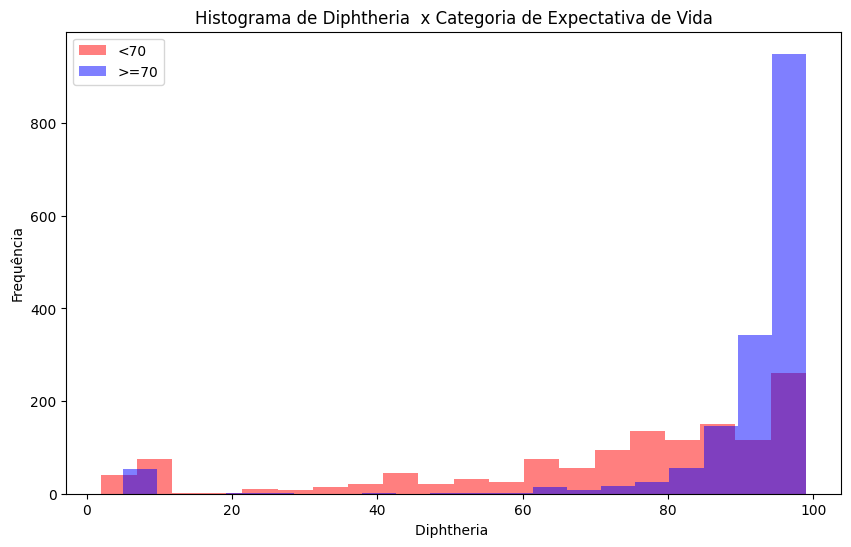

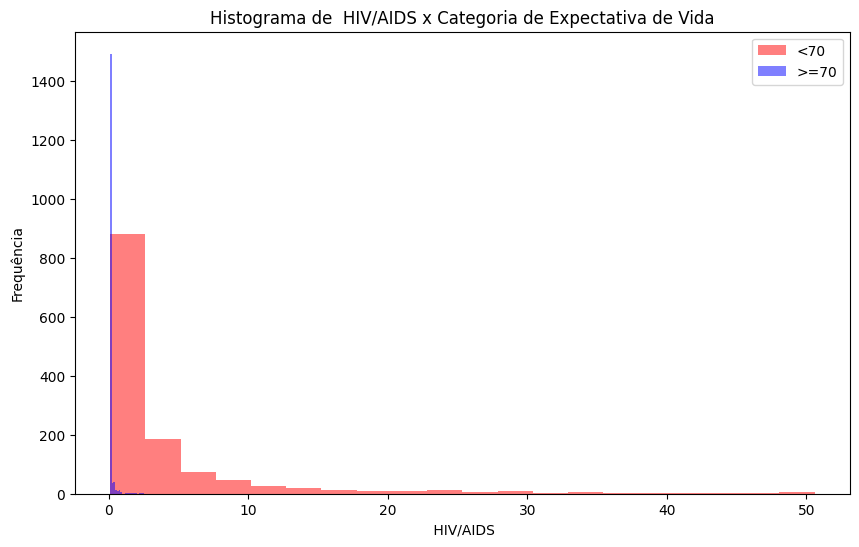

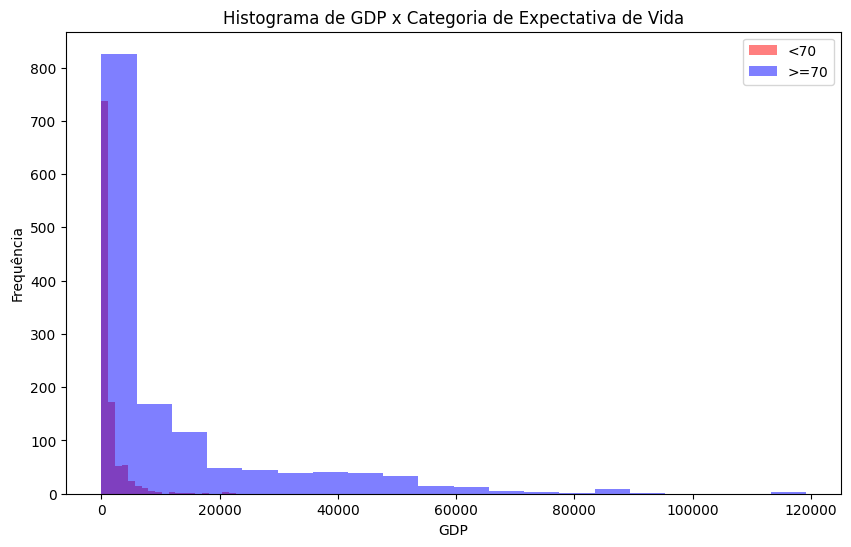

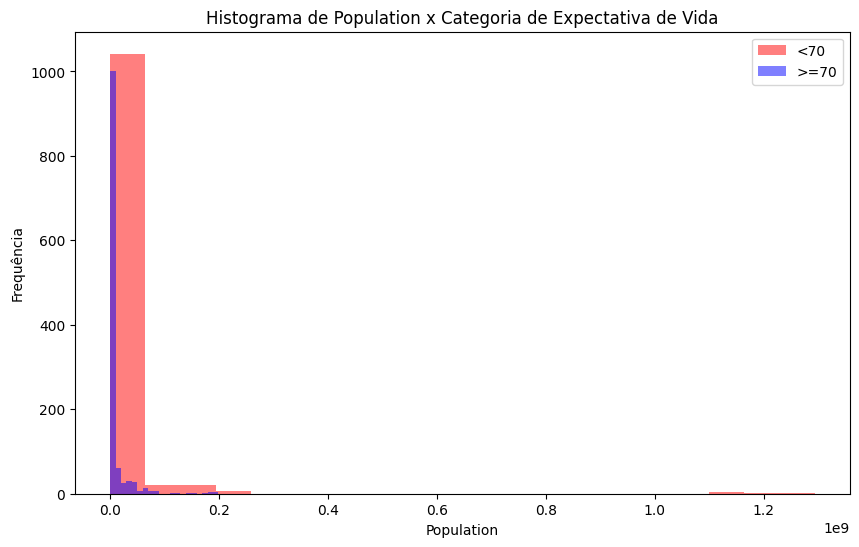

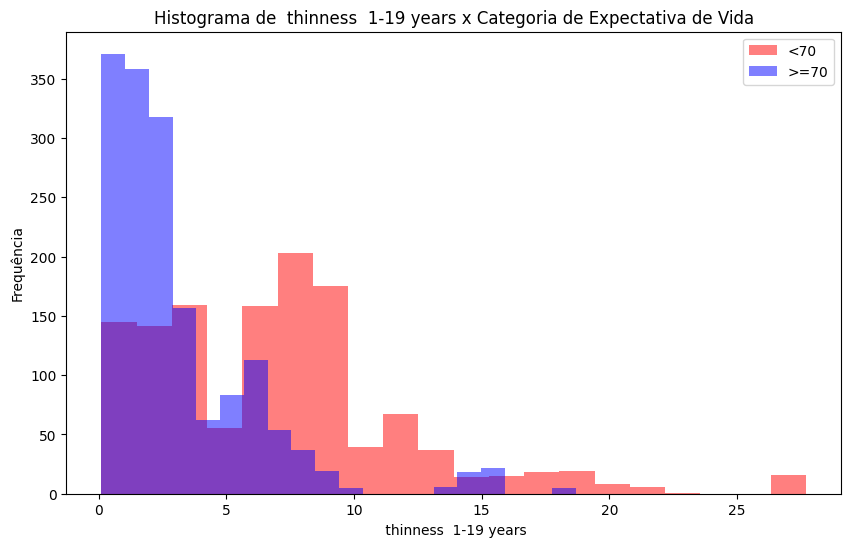

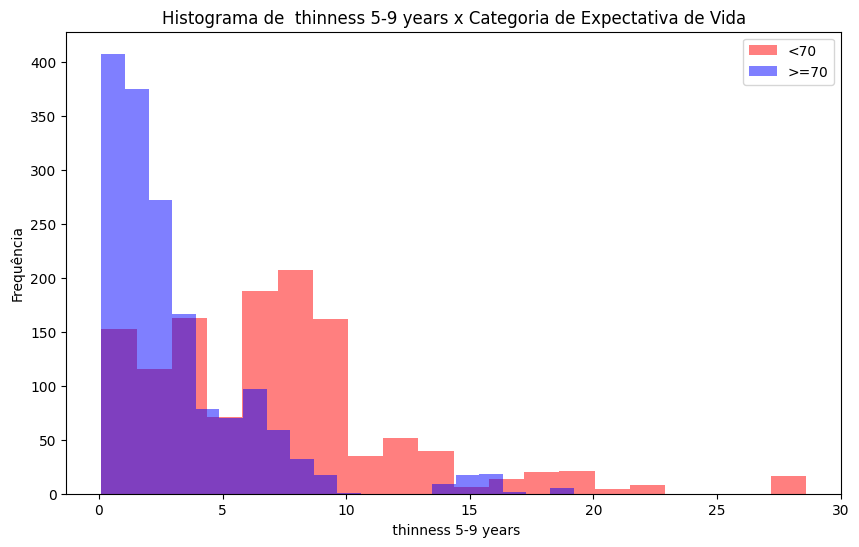

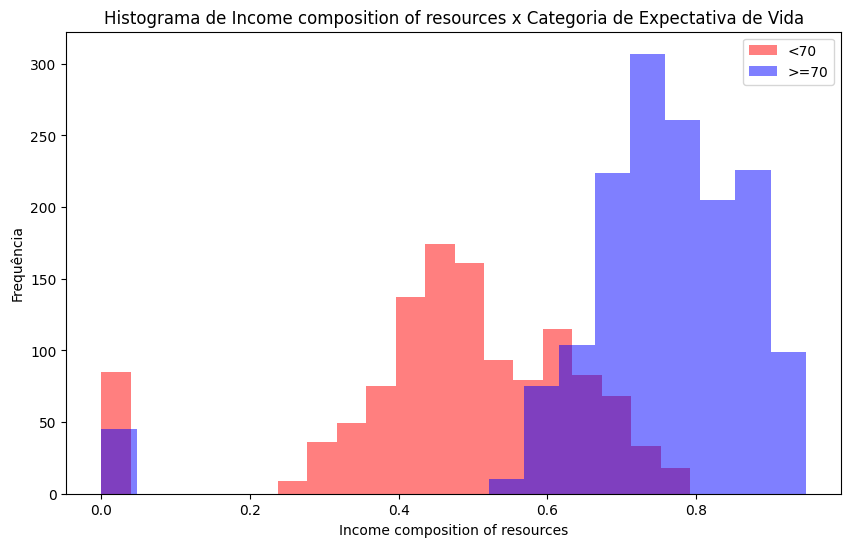

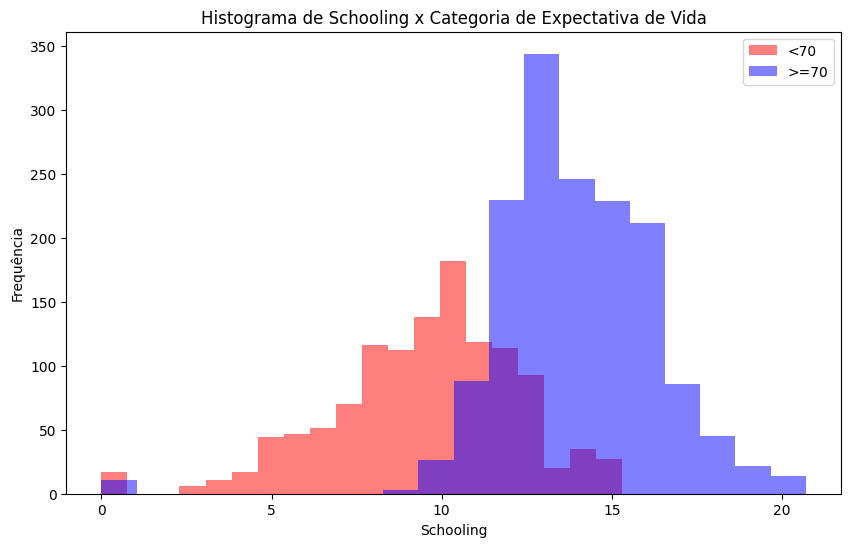

In [44]:
# Análise do comportamento das variáveis por categoria

for coluna in variaveis_numericas:
    # Criar uma figura para cada variável
    plt.figure(figsize=(10, 6))
    
    # Plotar o histograma para as duas classes
    dados[dados['Life_expectancy_category'] == '<70'][coluna].plot(kind='hist', alpha=0.5, bins=20, label='<70', color='red')
    dados[dados['Life_expectancy_category'] == '>=70'][coluna].plot(kind='hist', alpha=0.5, bins=20, label='>=70', color='blue')
    
    # Adicionar título e rótulos
    plt.title(f'Histograma de {coluna} x Categoria de Expectativa de Vida')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.legend()
    
    # Exibir o gráfico
    plt.show()


# Separação da base